In [19]:
# Librerías
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Constantes importadas
from scipy.constants import mu_0, pi

# Constantes
campo_magnetico_terrestre_N_S =  26693e-9

# Estilo de las gráficas
sns.set_theme()


In [20]:
campo_magnetico_I_variable_df = pd.read_excel(r'Campo_Magnetico.xlsx', r'Hoja2')
campo_magnetico_I_variable_df

,N,corriente_Amp,error_corriente_Amp,angulo_Gra,error_angulo_Gra,campo_magnetico_uT,error_campo_magnetico_uT,voltaje_v,error_voltaje_v
0,1,2.50,0.01550,44,2,43.5,1,5.6,0.1
1,2,2.01,0.01305,38,2,40.0,1,4.4,0.1
2,3,1.51,0.01055,32,2,37.0,1,3.3,0.1
3,4,1.00,0.00800,24,2,33.4,1,2.1,0.1
4,5,0.50,0.00550,12,2,29.5,1,1.0,0.1


In [21]:
distancia_m = 0.1

campo_magnetico_I_variable_df['campo_magnetico_calculado_T'] = (mu_0 * campo_magnetico_I_variable_df.corriente_Amp) / (2 * pi * distancia_m)
campo_magnetico_I_variable_df['error_campo_magnetico_calculado_T'] = ((mu_0) / (2 * pi * distancia_m)) * campo_magnetico_I_variable_df.error_corriente_Amp

campo_magnetico_I_variable_df['campo_magnetico_calculado_uT'] = campo_magnetico_I_variable_df.campo_magnetico_calculado_T * 1e-6
campo_magnetico_I_variable_df['error_campo_magnetico_calculado_uT'] = campo_magnetico_I_variable_df.error_campo_magnetico_calculado_T * 1e-6

campo_magnetico_I_variable_df['campo_magnetico_T'] = campo_magnetico_I_variable_df.campo_magnetico_uT * 1e-6
campo_magnetico_I_variable_df['error_campo_magnetico_T'] = campo_magnetico_I_variable_df.error_campo_magnetico_uT * 1e-6

campo_magnetico_I_variable_df['angulo_Rad'] = np.deg2rad(campo_magnetico_I_variable_df.angulo_Gra)
campo_magnetico_I_variable_df['error_angulo_Rad'] = np.deg2rad(campo_magnetico_I_variable_df.error_angulo_Gra)

campo_magnetico_I_variable_df['campo_magnetico_theta_T'] = campo_magnetico_terrestre_N_S * np.tan(campo_magnetico_I_variable_df.angulo_Rad)
campo_magnetico_I_variable_df['error_campo_magnetico_theta_T'] = campo_magnetico_terrestre_N_S * (np.cos(campo_magnetico_I_variable_df.angulo_Rad) ** -2) * campo_magnetico_I_variable_df.error_angulo_Rad

campo_magnetico_I_variable_df

,N,corriente_Amp,error_corriente_Amp,angulo_Gra,error_angulo_Gra,campo_magnetico_uT,error_campo_magnetico_uT,voltaje_v,error_voltaje_v,campo_magnetico_calculado_T,error_campo_magnetico_calculado_T,campo_magnetico_calculado_uT,error_campo_magnetico_calculado_uT,campo_magnetico_T,error_campo_magnetico_T,angulo_Rad,error_angulo_Rad,campo_magnetico_theta_T,error_campo_magnetico_theta_T
0,1,2.50,0.01550,44,2,43.5,1,5.6,0.1,5.000000e-06,3.100000e-08,5.000000e-12,3.100000e-14,0.000044,0.000001,0.767945,0.034907,0.000026,1.800680e-06
1,2,2.01,0.01305,38,2,40.0,1,4.4,0.1,4.020000e-06,2.610000e-08,4.020000e-12,2.610000e-14,0.000040,0.000001,0.663225,0.034907,0.000021,1.500515e-06
2,3,1.51,0.01055,32,2,37.0,1,3.3,0.1,3.020000e-06,2.110000e-08,3.020000e-12,2.110000e-14,0.000037,0.000001,0.558505,0.034907,0.000017,1.295579e-06
3,4,1.00,0.00800,24,2,33.4,1,2.1,0.1,2.000000e-06,1.600000e-08,2.000000e-12,1.600000e-14,0.000033,0.000001,0.418879,0.034907,0.000012,1.116463e-06
4,5,0.50,0.00550,12,2,29.5,1,1.0,0.1,1.000000e-06,1.100000e-08,1.000000e-12,1.100000e-14,0.000029,0.000001,0.209440,0.034907,0.000006,9.738587e-07


Regresión lineal: Campo experimental 
----------------------------------------
Pendiente: (6.9e-06 ±  1.7e-07)
Intercepto: ( 2.6e-05 ±  2.8e-07)

Regresión lineal: Campo I 
----------------------------------------
Pendiente: (2e-06 ±  3.3e-22)
Intercepto: ( 2.6e-05 ±  5.4e-22)

Regresión lineal: Campo Theta 
----------------------------------------
Pendiente: (9.8e-06 ±  3.9e-07)
Intercepto: ( 1.4e-06 ±  6.5e-07)



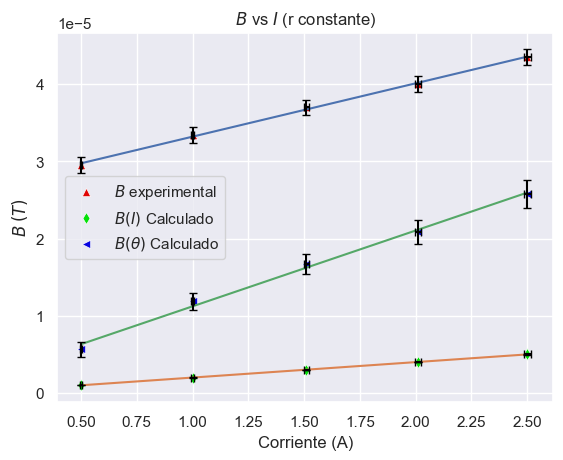

In [29]:
# Ajuste lineal (grado 1)
x = campo_magnetico_I_variable_df.corriente_Amp

y1 = campo_magnetico_I_variable_df.campo_magnetico_T
coeficientes_1, M_cov_1 = np.polyfit(x, y1, 1, cov=True)
m1, b1 = coeficientes_1
error_m1, error_b1 = np.sqrt(np.diag(M_cov_1))
print(f"Regresión lineal: Campo experimental \n{'-'*40}\nPendiente: ({m1 :.2g} ± {error_m1: .2g})\nIntercepto: ({b1 : .2g} ± {error_b1 : .2g})\n")

y2 = campo_magnetico_I_variable_df.campo_magnetico_calculado_T
coeficientes_2, M_cov_2 = np.polyfit(x, y2, 1, cov=True)
m2, b2 = coeficientes_2
error_m2, error_b2 = np.sqrt(np.diag(M_cov_2))
print(f"Regresión lineal: Campo I \n{'-'*40}\nPendiente: ({m2 :.2g} ± {error_m2: .2g})\nIntercepto: ({b1 : .2g} ± {error_b2 : .2g})\n")

y3 = campo_magnetico_I_variable_df.campo_magnetico_theta_T
coeficientes_3, M_cov_3 = np.polyfit(x, y3, 1, cov=True)
m3, b3 = coeficientes_3
error_m3, error_b3 = np.sqrt(np.diag(M_cov_3))
print(f"Regresión lineal: Campo Theta \n{'-'*40}\nPendiente: ({m3 :.2g} ± {error_m3: .2g})\nIntercepto: ({b3 : .2g} ± {error_b3 : .2g})\n")


# Graficar
sns.lineplot(x= x, y= (m1 * x) + b1)
sns.scatterplot(data= campo_magnetico_I_variable_df, x= 'corriente_Amp', y= 'campo_magnetico_T', color= "#E00404", marker= '^', label= r'$B$ experimental')
plt.errorbar(campo_magnetico_I_variable_df.corriente_Amp, campo_magnetico_I_variable_df.campo_magnetico_T, xerr= campo_magnetico_I_variable_df.error_corriente_Amp, yerr=campo_magnetico_I_variable_df.error_campo_magnetico_T, fmt='none', ecolor="#000000", capsize=3)

sns.lineplot(x= x, y= (m2 * x) + b2)
sns.scatterplot(data= campo_magnetico_I_variable_df, x= 'corriente_Amp', y= 'campo_magnetico_calculado_T', color= "#04E008", marker= 'd', label= r'$B(I)$ Calculado')
plt.errorbar(campo_magnetico_I_variable_df.corriente_Amp, campo_magnetico_I_variable_df.campo_magnetico_calculado_T, xerr= campo_magnetico_I_variable_df.error_corriente_Amp, yerr=campo_magnetico_I_variable_df.error_campo_magnetico_calculado_T, fmt='none', ecolor="#000000", capsize=3)

sns.lineplot(x= x, y= (m3 * x) + b3)
sns.scatterplot(data= campo_magnetico_I_variable_df, x= 'corriente_Amp', y= 'campo_magnetico_theta_T', color= "#0804E0", marker= '<', label= r'$B(\theta)$ Calculado')
plt.errorbar(campo_magnetico_I_variable_df.corriente_Amp, campo_magnetico_I_variable_df.campo_magnetico_theta_T, xerr= campo_magnetico_I_variable_df.error_corriente_Amp, yerr=campo_magnetico_I_variable_df.error_campo_magnetico_theta_T, fmt='none', ecolor="#000000", capsize=3)

plt.legend()
plt.xlabel('Corriente (A)')
plt.ylabel(r'$B \: (T)$')
plt.title(f'$B$ vs $I$ (r constante)')

plt.show()

In [23]:
campo_magnetico_R_variable_df = pd.read_excel(r'Campo_Magnetico.xlsx', r'Hoja3')
campo_magnetico_R_variable_df

,N,angulo_Gra,error_angulo_Gra,campo_magnetico_uT,error_campo_magnetico_uT,distancia_cm,error_distancia_cm
0,1,62,2,76.0,1,5,0.1
1,2,54,2,60.5,1,7,0.1
2,3,48,2,46.0,1,9,0.1
3,4,44,2,42.0,1,11,0.1
4,5,32,2,33.0,1,15,0.1


In [24]:
campo_magnetico_R_variable_df['distancia_m'] = campo_magnetico_R_variable_df.distancia_cm * 1e-2
campo_magnetico_R_variable_df['error_distancia_m'] = campo_magnetico_R_variable_df.error_distancia_cm * 1e-2

campo_magnetico_R_variable_df['angulo_Rad'] = np.deg2rad(campo_magnetico_R_variable_df.angulo_Gra)
campo_magnetico_R_variable_df['error_angulo_Rad'] = np.deg2rad(campo_magnetico_R_variable_df.error_angulo_Gra)

campo_magnetico_R_variable_df['campo_magnetico_T'] = campo_magnetico_R_variable_df.campo_magnetico_uT * 1e-6
campo_magnetico_R_variable_df['error_campo_magnetico_T'] = campo_magnetico_R_variable_df.error_campo_magnetico_uT * 1e-6

campo_magnetico_R_variable_df['r_inverso'] = campo_magnetico_R_variable_df.distancia_m ** -1
campo_magnetico_R_variable_df['error_r_inverso'] = (campo_magnetico_R_variable_df.r_inverso ** 2) * campo_magnetico_R_variable_df.error_distancia_m

campo_magnetico_R_variable_df['campo_magnetico_calculado_T'] = (mu_0 * 2.5) / (2 * pi * campo_magnetico_R_variable_df.distancia_m)
campo_magnetico_R_variable_df['error_campo_magnetico_calculado_T'] = ((mu_0 * 2.5) / (2 * pi * (campo_magnetico_R_variable_df.distancia_m ** 2))) * (campo_magnetico_R_variable_df.error_distancia_m)

campo_magnetico_R_variable_df['campo_magnetico_theta_T'] = campo_magnetico_terrestre_N_S * np.tan(campo_magnetico_R_variable_df.angulo_Rad)
campo_magnetico_R_variable_df['error_campo_magnetico_theta_T'] = campo_magnetico_terrestre_N_S * (np.cos(campo_magnetico_R_variable_df.angulo_Rad) ** -2) * campo_magnetico_R_variable_df.error_angulo_Rad

campo_magnetico_R_variable_df


,N,angulo_Gra,error_angulo_Gra,campo_magnetico_uT,error_campo_magnetico_uT,distancia_cm,error_distancia_cm,distancia_m,error_distancia_m,angulo_Rad,error_angulo_Rad,campo_magnetico_T,error_campo_magnetico_T,r_inverso,error_r_inverso,campo_magnetico_calculado_T,error_campo_magnetico_calculado_T,campo_magnetico_theta_T,error_campo_magnetico_theta_T
0,1,62,2,76.0,1,5,0.1,0.05,0.001,1.082104,0.034907,0.000076,0.000001,20.000000,0.400000,0.000010,2.000000e-07,0.000050,0.000004
1,2,54,2,60.5,1,7,0.1,0.07,0.001,0.942478,0.034907,0.000061,0.000001,14.285714,0.204082,0.000007,1.020408e-07,0.000037,0.000003
2,3,48,2,46.0,1,9,0.1,0.09,0.001,0.837758,0.034907,0.000046,0.000001,11.111111,0.123457,0.000006,6.172840e-08,0.000030,0.000002
3,4,44,2,42.0,1,11,0.1,0.11,0.001,0.767945,0.034907,0.000042,0.000001,9.090909,0.082645,0.000005,4.132231e-08,0.000026,0.000002
4,5,32,2,33.0,1,15,0.1,0.15,0.001,0.558505,0.034907,0.000033,0.000001,6.666667,0.044444,0.000003,2.222222e-08,0.000017,0.000001


Regresión lineal: Campo experimental 
----------------------------------------
Pendiente: (3.3e-06 ±  1.8e-07)
Intercepto: ( 1.2e-05 ±  2.3e-06)

Regresión lineal: Campo R 
----------------------------------------
Pendiente: (5e-07 ±  1.6e-23)
Intercepto: ( 1.2e-05 ±  2.1e-22)

Regresión lineal: Campo Theta 
----------------------------------------
Pendiente: (2.4e-06 ±  1.3e-07)
Intercepto: ( 2.2e-06 ±  1.7e-06)



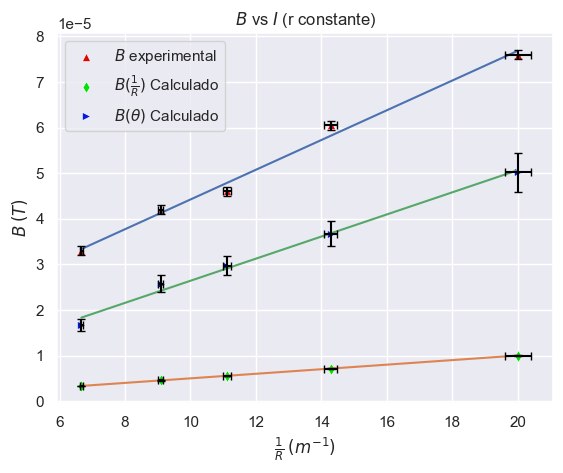

In [25]:
# Ajuste lineal (grado 1)
x = campo_magnetico_R_variable_df.r_inverso

y1 = campo_magnetico_R_variable_df.campo_magnetico_T
coeficientes_1, M_cov_1 = np.polyfit(x, y1, 1, cov=True)
m1, b1 = coeficientes_1
error_m1, error_b1 = np.sqrt(np.diag(M_cov_1))
print(f"Regresión lineal: Campo experimental \n{'-'*40}\nPendiente: ({m1 :.2g} ± {error_m1: .2g})\nIntercepto: ({b1 : .2g} ± {error_b1 : .2g})\n")

y2 = campo_magnetico_R_variable_df.campo_magnetico_calculado_T
coeficientes_2, M_cov_2 = np.polyfit(x, y2, 1, cov=True)
m2, b2 = coeficientes_2
error_m2, error_b2 = np.sqrt(np.diag(M_cov_2))
print(f"Regresión lineal: Campo R \n{'-'*40}\nPendiente: ({m2 :.2g} ± {error_m2: .2g})\nIntercepto: ({b1 : .2g} ± {error_b2 : .2g})\n")

y3 = campo_magnetico_R_variable_df.campo_magnetico_theta_T
coeficientes_3, M_cov_3 = np.polyfit(x, y3, 1, cov=True)
m3, b3 = coeficientes_3
error_m3, error_b3 = np.sqrt(np.diag(M_cov_3))
print(f"Regresión lineal: Campo Theta \n{'-'*40}\nPendiente: ({m3 :.2g} ± {error_m3: .2g})\nIntercepto: ({b3 : .2g} ± {error_b3 : .2g})\n")

# Graficar
sns.lineplot(x= x, y= m1*x +b1)
sns.scatterplot(data= campo_magnetico_R_variable_df, x= 'r_inverso', y= 'campo_magnetico_T', color= "#E00404", marker= '^', label= r'$B$ experimental')
plt.errorbar(campo_magnetico_R_variable_df.r_inverso, campo_magnetico_R_variable_df.campo_magnetico_T, xerr= campo_magnetico_R_variable_df.error_r_inverso, yerr=campo_magnetico_R_variable_df.error_campo_magnetico_T, fmt='none', ecolor="#000000", capsize=3)

sns.lineplot(x= x, y= m2*x +b2)
sns.scatterplot(data= campo_magnetico_R_variable_df, x= 'r_inverso', y= 'campo_magnetico_calculado_T', color= "#04E008", marker= 'd', label= r'$B(\frac{1}{R})$ Calculado')
plt.errorbar(campo_magnetico_R_variable_df.r_inverso, campo_magnetico_R_variable_df.campo_magnetico_calculado_T, xerr= campo_magnetico_R_variable_df.error_r_inverso, yerr=campo_magnetico_R_variable_df.error_campo_magnetico_calculado_T, fmt='none', ecolor="#000000", capsize=3)

sns.lineplot(x= x, y= m3*x +b3)
sns.scatterplot(data= campo_magnetico_R_variable_df, x= 'r_inverso', y= 'campo_magnetico_theta_T', color= "#041AE0", marker= '>', label= r'$B(\theta)$ Calculado')
plt.errorbar(campo_magnetico_R_variable_df.r_inverso, campo_magnetico_R_variable_df.campo_magnetico_theta_T, xerr= campo_magnetico_R_variable_df.error_r_inverso, yerr=campo_magnetico_R_variable_df.error_campo_magnetico_theta_T, fmt='none', ecolor="#000000", capsize=3)

plt.legend()
plt.xlabel(r'$\frac{1}{R} \: (m^{-1})$')
plt.ylabel(r'$B \: (T)$')
plt.title(f'$B$ vs $I$ (r constante)')

plt.show()

In [26]:
with pd.ExcelWriter('Campo_Magnetico_python.xlsx') as ruta_archivo:
    campo_magnetico_I_variable_df.to_excel(ruta_archivo, sheet_name='Corriente')
    campo_magnetico_R_variable_df.to_excel(ruta_archivo, sheet_name='Radio')